In [475]:
import numpy as np
import math
import torch
import torch_optimizer as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%run -i E:\Repo\HW_4\utils.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


# 变量
sdss_path = 'E:/Repo/HW_4/frame-g-002126-4-0442.fits'
BUNIT = 3.531e-6





cpu


galaxy centre is 99, 87


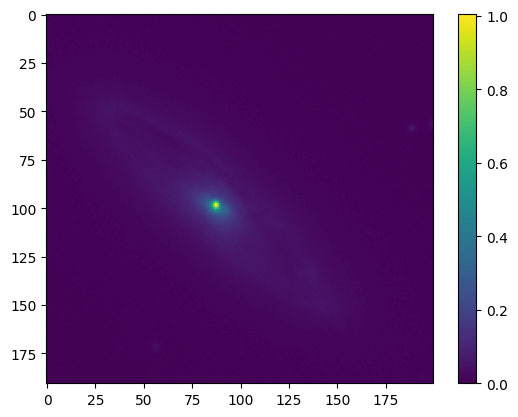

In [476]:
sdss_raw, sdss_head = get_data(sdss_path, 'sdss')
sdss_data = np.array(sdss_raw)[345: 536, 1553: 1753]
sdss_back = np.array(sdss_raw)[100: 200, 300: 400]

sdss_data, sdss_centre_x, sdss_centre_y = cal_centre(sdss_data)
print('galaxy centre is {}, {}'.format(sdss_centre_x, sdss_centre_y))
plt.imshow(sdss_data)
np.save('E:/Repo/HW_4/sdss.npy', sdss_data)
plt.colorbar()

-0.0005359778
20.87154574617621


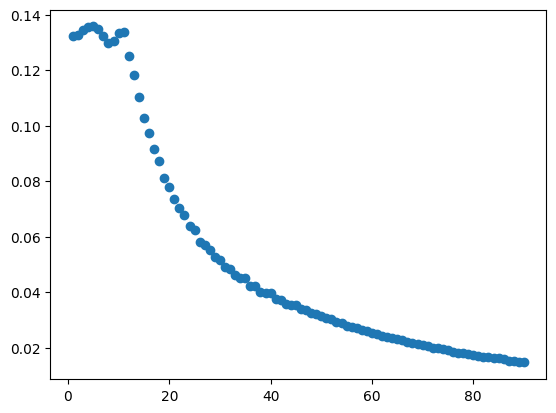

In [481]:
back = np.mean(sdss_back)
print(back)
# 应该是剪掉过背景了
scale = [536 - 345, 1753 - 1553]
centre = [99, 87]
data = np.load('E:/Repo/HW_4/sdss.npy')
x = torch.cat([torch.arange(1, scale[1] + 1).reshape(scale[1], 1)] * scale[0], dim=1).t().to(device)
y = torch.cat([torch.flip(torch.arange(1, scale[0] + 1).reshape(scale[0], 1), dims=[0])] * scale[1], dim=1).to(device)
r = np.sqrt((x - centre[0])**2 + (y - centre[1])**2)
#r = pd.DataFrame(r)
abs = []
for r0 in np.linspace(1, 90, 90):
    #a = r[(r[:] > r0) & (r[:] < r0+3)]
    a = np.where((r > r0) & (r < r0+1))
    ams = 0
    square = len(a[0]) * len(a[1])
    for i in a[0]:
        for j in a[1]:
            ams = ams + data[i][j]     
    abs.append(ams / square)
    
r01 = np.linspace(1, 90, 90)
plt.scatter(r01, abs)

mag = -2.5 * np.log10(np.sum(abs) * BUNIT / 3631) 
print(mag)
    
    

In [482]:

def integ_sersic(x, nser):
    # x = R/R_d
    # 设R_d, I_0 = 1
    result = 2 * math.pi * nser * torch.exp(torch.lgamma(2 * nser)) * torch.special.gammainc(2 * nser, x**(1/nser))
    return result


def cal(x, nser, R):
    for i in np.arange(epoch):
        loss = (2* math.pi * R - integ_sersic(x, nser)) ** 2  
        
        loss = loss.sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(x)
    print(loss)


In [483]:
x = torch.Tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0]).to(device)
x.requires_grad = True
n = torch.Tensor([1.0, 1.0, 3.0, 3.0, 4.0, 4.0]).to(device)
R = torch.Tensor([0.5, 0.9, 0.5, 0.9, 0.5, 0.9]).to(device)
epoch = 5000
optimizer = torch.optim.Adam([x], lr=0.01)
cal(x, n , R)

tensor([1.6783, 3.8897, 1.6499, 2.3558, 1.6492, 2.3116], requires_grad=True)
tensor(2.0350e-11, grad_fn=<SumBackward0>)


### good~